In [1]:
#Load and Process Data in Google Colab
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the Dataset
import pandas as pd

# Define the file path (modify it based on your Google Drive structure)
file_path = "/content/drive/MyDrive/Datasets/healthcare-dataset-stroke-data.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()


Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#Handle Missing Values in BMI
# Check missing values
print(df.isnull().sum())

# Fill missing BMI values with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<ipython-input-2-afc611c36046>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


<ipython-input-3-80b18295f5f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="coolwarm")


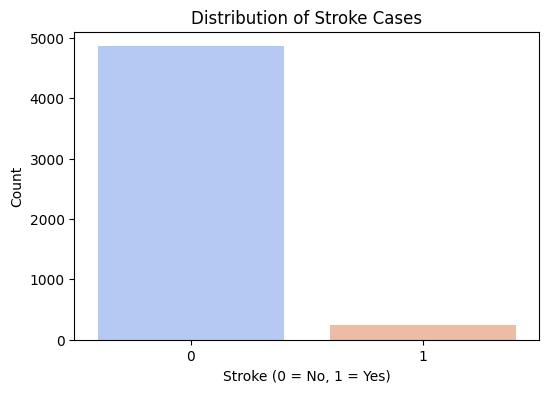

In [3]:
#Perform Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Stroke Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df, palette="coolwarm")
plt.title("Distribution of Stroke Cases")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [4]:
#Convert Categorical Variables
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], drop_first=True)

# Display processed dataset
df.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [5]:
#Save Processed Dataset
# Save the processed dataset for next phases
processed_file_path = "/content/drive/MyDrive/Datasets/processed_stroke_data.csv"
df.to_csv(processed_file_path, index=False)

print(f"Processed dataset saved at: {processed_file_path}")


Processed dataset saved at: /content/drive/MyDrive/Datasets/processed_stroke_data.csv
